## Bibliotecas usadas

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score


## Tratamento de dados
Foi optado por utilizar os dados a partir de 1990 e os países que não possuiam dados suficientes, logicamente foram retirados da pesquisa. Foram dividos em 4 dataframes diferentes os dados contendo basicamente os dados referentes a cada ano. E uma coluna mostrando os países só para fim de curiosidade, até então.


### Dados da Quantidade de água retirada - Target
Aqui estão os dados relacionados a quantidade de água potável retirada dos recursos naturais dos países nos ultimos anos.

In [35]:
df_quant_agua_retirada = pd.read_csv('dados/Quant_agua_retirada.csv')

df_quant_agua_retirada.head()

year_columns = [col for col in df_quant_agua_retirada.columns if col.isdigit() and 1990 <= int(col) <= 2020]

df_filtered = df_quant_agua_retirada.loc[:, ["Country Name"] + year_columns]

df_quant_agua_retirada = df_filtered.dropna()

df_quant_agua_retirada.head(5)


,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Africa Eastern and Southern,37.106420,37.290088,39.208555,39.373356,41.953880,43.105390,43.839187,44.586784,45.334380,...,62.796618,90.897739,90.206760,92.689935,95.156360,96.659279,96.930950,97.640204,98.037076,98.377503
2,Afghanistan,24.521345,23.990473,23.460317,22.930160,22.400003,21.869847,21.339690,20.809534,20.282000,...,20.282000,20.282000,20.282000,20.282000,20.282000,20.282000,20.282000,20.282000,20.282000,20.282000
3,Africa Western and Central,16.867525,17.639996,18.427547,19.348702,20.269858,21.179275,22.088730,22.952845,23.904109,...,30.086001,30.175897,30.255009,30.335321,30.664199,30.741378,30.614788,32.040511,32.228108,32.228108
4,Angola,0.517015,0.529354,0.541692,0.554031,0.566369,0.578708,0.591046,0.603385,0.615723,...,0.705700,0.705700,0.705700,0.705700,0.705700,0.705700,0.705700,0.705700,0.705700,0.705700
5,Albania,1.200000,1.191780,1.183560,1.175340,1.167120,1.158900,1.294680,1.430460,1.566240,...,1.149020,1.124340,1.099660,1.074980,0.920000,1.092000,1.091000,0.958000,1.131000,0.786000


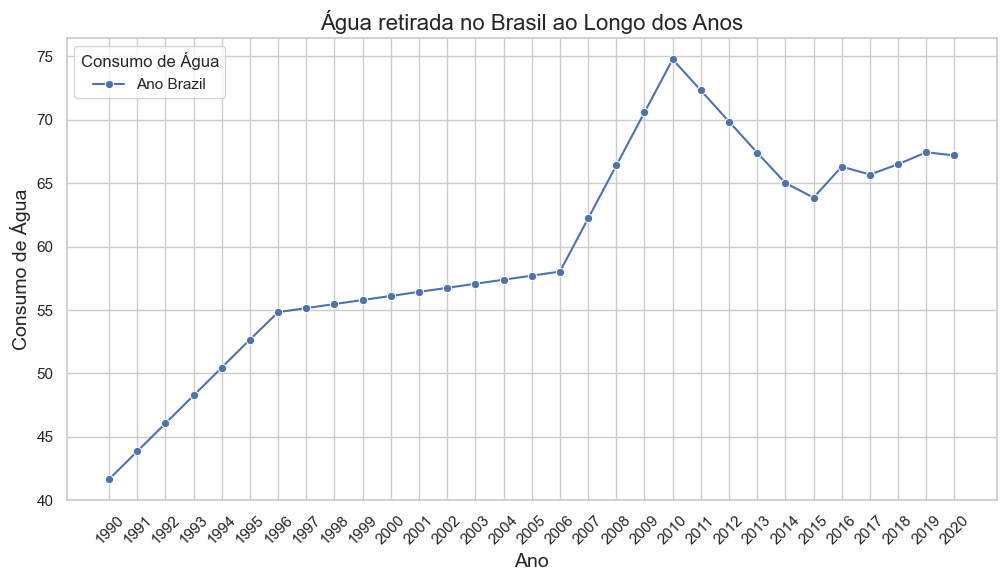

In [36]:
brasil_consumo = df_quant_agua_retirada[df_quant_agua_retirada['Country Name'] == 'Brazil']
brasil_consumo = brasil_consumo.set_index('Country Name').T
brasil_consumo.columns = [f"Ano {col}" for col in brasil_consumo.columns]


sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(data=brasil_consumo, marker='o', dashes=False)

plt.title('Água retirada no Brasil ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Consumo de Água', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Consumo de Água', loc='upper left')
plt.grid(True)

plt.show()


### Dados da populacão

Aqui estão os dados com relação a população dos paises ao longo dos anos.

In [62]:
df_populacoes = pd.read_csv('dados/populacoes.csv')
year_columns = [col for col in df_populacoes.columns if col.isdigit() and 1990 <= int(col) <= 2020]
df_populacoes = df_populacoes.loc[:, ["Country Name"] + year_columns]
df_populacoes = df_populacoes.dropna()
df_populacoes.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,65712.0,67864.0,70192.0,72360.0,74710.0,77050.0,79417.0,81858.0,84355.0,...,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0
1,Africa Eastern and Southern,309890664.0,318544083.0,326933522.0,335625136.0,344418362.0,353466601.0,362985802.0,372352230.0,381715600.0,...,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0
2,Afghanistan,10694796.0,10745167.0,12057433.0,14003760.0,15455555.0,16418912.0,17106595.0,17788819.0,18493132.0,...,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0
3,Africa Western and Central,206739024.0,212172888.0,217966101.0,223788766.0,229675775.0,235861484.0,242200260.0,248713095.0,255482918.0,...,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0
4,Angola,11828638.0,12228691.0,12632507.0,13038270.0,13462031.0,13912253.0,14383350.0,14871146.0,15366864.0,...,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0


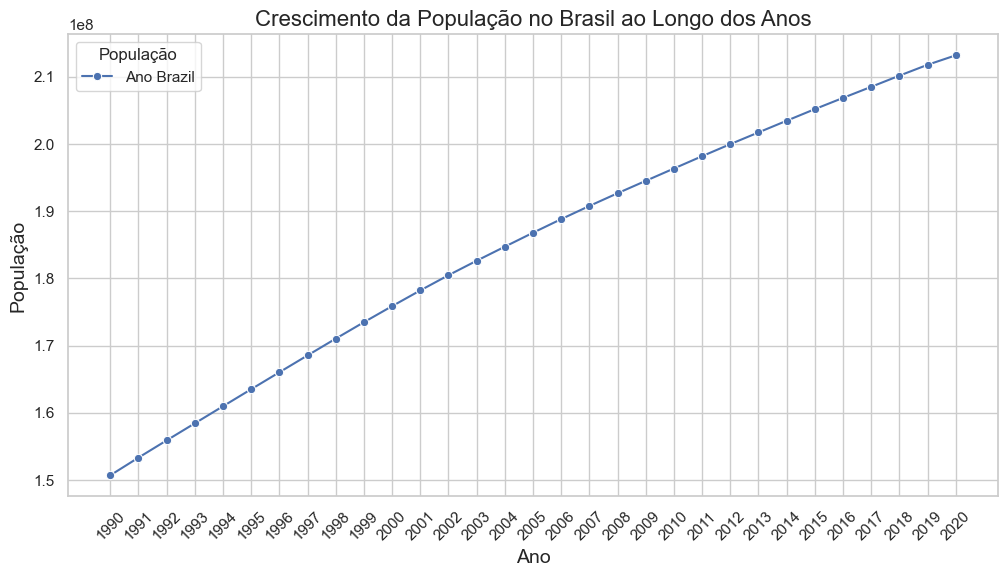

In [38]:
brasil_populacao = df_populacoes[df_populacoes['Country Name'] == 'Brazil']
brasil_populacao = brasil_populacao.set_index('Country Name').T
brasil_populacao.columns = [f"Ano {col}" for col in brasil_populacao.columns]

sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=brasil_populacao, marker='o', dashes=False, color='purple')

plt.title('Crescimento da População no Brasil ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('População', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='População', loc='upper left')
plt.grid(True)

plt.show()


### Dados da área floresta

Aqui estão os dados com relação a porcetagem de área florestal no Brasil.

In [39]:
df_floresta = pd.read_csv('dados/Area_florestal.csv')
year_columns = [col for col in df_floresta.columns if col.isdigit() and 1990 <= int(col) <= 2020]
df_floresta = df_floresta.loc[:, ["Country Name"] + year_columns]
df_floresta = df_floresta.dropna()
df_floresta.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333
1,Africa Eastern and Southern,36.230006,36.078752,35.927499,35.776246,35.624993,35.473739,35.322486,35.171233,35.019980,...,32.370994,31.890654,31.680635,31.470634,31.260420,31.039682,30.824316,30.611512,30.391626,30.174253
2,Afghanistan,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
3,Africa Western and Central,22.776908,22.658746,22.540583,22.422421,22.304258,22.186096,22.067933,21.949771,21.831608,...,20.586055,20.498099,20.410143,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816777
4,Angola,63.578070,63.453407,63.328745,63.204082,63.079419,62.954757,62.830094,62.705431,62.580768,...,57.433976,56.988751,56.543526,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951


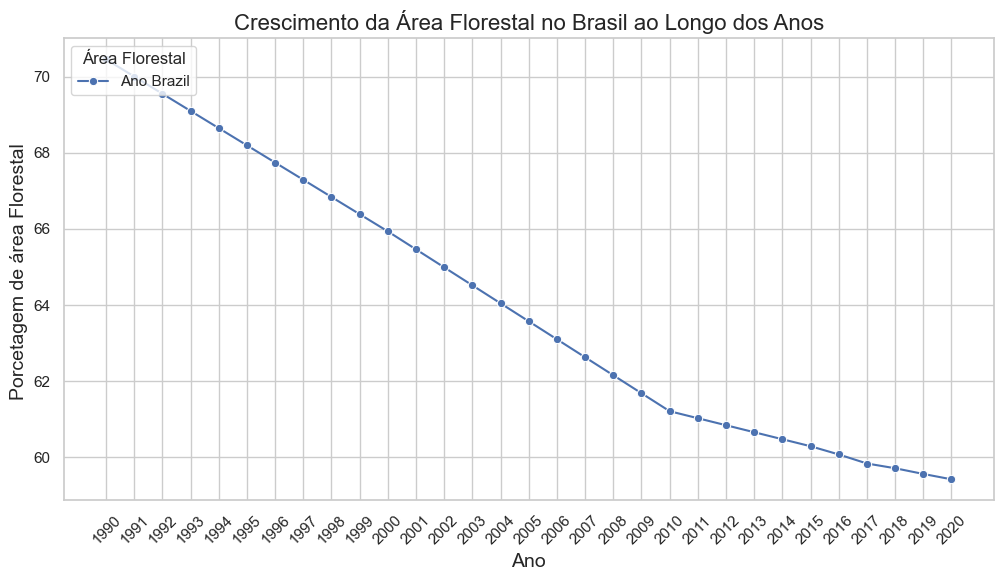

In [40]:
brasil_floresta = df_floresta[df_floresta['Country Name'] == 'Brazil']
brasil_floresta = brasil_floresta.set_index('Country Name').T
brasil_floresta.columns = [f"Ano {col}" for col in brasil_floresta.columns]

sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=brasil_floresta, marker='o', dashes=False, color='purple')

plt.title('Crescimento da Área Florestal no Brasil ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Porcetagem de área Florestal ', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Área Florestal', loc='upper left')
plt.grid(True)

plt.show()


### Dados crescimento industrial
Aqui estão os dados com relação ao crescimento da indústria.

In [41]:
df_industria = pd.read_csv('dados/Crescimento_industria_anual.csv')
year_columns = [col for col in df_industria.columns if col.isdigit() and 1990 <= int(col) <= 2020]
df_industria = df_industria.loc[:, ["Country Name"] + year_columns]
df_industria = df_industria.dropna()
df_industria.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Africa Eastern and Southern,-2.812901,-3.968869,-4.057264,-1.294881,2.013930,1.649771,3.044600,2.072576,-0.090804,...,3.179729,-0.010308,2.885705,4.193865,2.990967,2.038327,2.559256,2.804793,1.856316,-4.734432
3,Africa Western and Central,13.783019,-2.489870,4.155567,-5.222271,-3.634169,-1.381241,5.180103,2.753912,1.235496,...,8.301973,3.685178,2.925475,5.174918,-0.771681,-4.858438,3.513428,3.258055,4.389983,-3.231388
9,Argentina,-5.325308,10.687460,11.016753,5.470297,6.206351,-3.551437,6.193446,8.371140,1.946102,...,5.830918,-2.201127,0.551194,-3.462035,1.389808,-5.825159,2.302833,-3.049315,-4.740755,-9.283985
12,Antigua and Barbuda,-5.456424,5.611838,-3.266493,-5.530660,4.281430,1.810712,10.299204,7.278192,8.092570,...,-13.130946,2.057269,5.671063,4.977080,2.017030,14.427762,10.003165,21.170270,2.247215,-19.723424
14,Austria,6.240011,4.121731,0.953844,-0.172002,4.560873,3.370546,1.700153,1.638914,2.850080,...,3.983496,1.470782,0.590506,0.021937,-0.009310,3.035128,3.382553,3.228780,0.470822,-5.457495


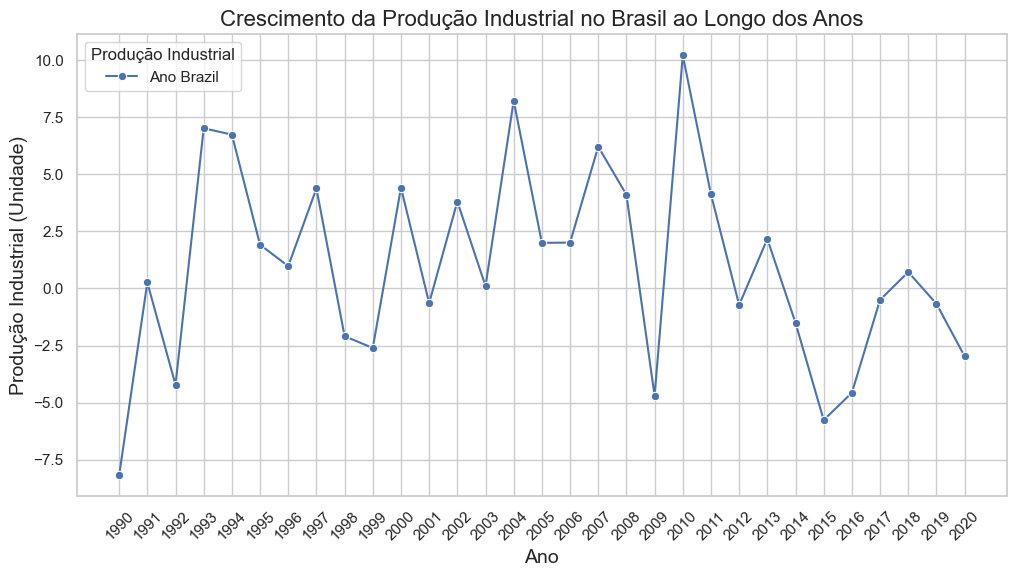

In [42]:
brasil_industria = df_industria[df_industria['Country Name'] == 'Brazil']
brasil_industria = brasil_industria.set_index('Country Name').T
brasil_industria.columns = [f"Ano {col}" for col in brasil_industria.columns]

sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=brasil_industria, marker='o', dashes=False, color='purple')

plt.title('Crescimento da Produção Industrial no Brasil ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Produção Industrial (Unidade)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Produção Industrial', loc='upper left')
plt.grid(True)

plt.show()


### Juntando os dataframes: 

Aqui são associados os dados e formado os vetores X e y

In [43]:
import pandas as pd
import numpy as np

# Supondo que os DataFrames já existam
# df_quant_agua_retirada, df_industria, df_floresta, df_populacoes

# Obtendo a interseção dos nomes dos países presentes em todos os DataFrames
common_countries = set(df_quant_agua_retirada['Country Name']).intersection(
    df_industria['Country Name'], 
    df_floresta['Country Name'], 
    df_populacoes['Country Name']
)

# Filtrando os DataFrames para manter apenas os países em comum
df_quant_agua_retirada = df_quant_agua_retirada[df_quant_agua_retirada['Country Name'].isin(common_countries)]
df_industria = df_industria[df_industria['Country Name'].isin(common_countries)]
df_floresta = df_floresta[df_floresta['Country Name'].isin(common_countries)]
df_populacoes = df_populacoes[df_populacoes['Country Name'].isin(common_countries)]

# Inicializando listas para armazenar X e y
X = []
y = []

# Definindo os anos a partir das colunas disponíveis (exceto a primeira coluna)
anos = df_quant_agua_retirada.columns[1:]  # Assume que o primeiro é 'Country Name'

# Iterando pelos países em comum
for country in common_countries:
    # Para cada ano, coleta as informações
    for ano in anos:
        # Certificando-se de que há dados para esse país e ano em todos os DataFrames
        if ano in df_quant_agua_retirada.columns and ano in df_industria.columns and ano in df_floresta.columns and ano in df_populacoes.columns:
            # Formando o vetor X com as características
            X.append([
                df_populacoes.loc[df_populacoes['Country Name'] == country, ano].values[0],  # População
                df_industria.loc[df_industria['Country Name'] == country, ano].values[0],    # Indústria
                df_floresta.loc[df_floresta['Country Name'] == country, ano].values[0]       # Floresta
            ])
            # Formando o vetor y com a quantidade de água retirada
            y.append(df_quant_agua_retirada.loc[df_quant_agua_retirada['Country Name'] == country, ano].values[0])  # Alvo: quantidade de água retirada


X = np.array(X)
y = np.array(y)

print("-----------  Dados de exemplo  -------------\n")
print("X:")
print(X[-1]) 
print("\ny:")
print(y[-1]) 


-----------  Dados de exemplo  -------------

X:
[6.61869500e+06 8.04576908e-01 4.05292223e+01]

y:
2.413


## Normalização dos dados

Para evitar que a escala das variáveis influencie de maneira negativa o desempenho do modelo SVM, os dados foram normalizados utilizando a técnica de StandardScaler. Isso garante que todas as features tenham médias zero e variâncias unitárias, o que é crucial para o correto funcionamento do SVM.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Criação de classes
Foi definido as clsses Classe baixo(0): Menor que 0.70 bilhões de metro cúbicos.
Classe moderado(1): Menor que 6.71 e maior que 0.70 bilhões de metros cúbicos
Classe Alto (2): maior que 6.71 bilhões de metro cubicos. levando em consideração os quartis do dados, visando gerar dados balanceados.

In [44]:
import numpy as np

# Calculando os limites dos quartis
limite_1 = np.percentile(y, 33)  # 1º quartil (33% dos menores valores)
limite_2 = np.percentile(y, 66)  # 2º quartil (66% dos menores valores)

# Inicializsndo o vetor de classes (y_class) com zeros, do mesmo tamanho que y
y_class = np.zeros_like(y)

# Classifica-se os valores de acordo com os limites dos quartis
y_class[y <= limite_1] = 0  # Classe 0: abaixo ou igual ao 1º quartil
y_class[(y > limite_1) & (y <= limite_2)] = 1  # Classe 1: entre o 1º e o 2º quartil
y_class[y > limite_2] = 2  # Classe 2: acima do 2º quartil

# Atualizando o y com as classes
y = y_class

print(f"Classe baixo(0): Menor que {limite_1:.2f} bilhões de metro cúbicos.")
print(f"Classe moderado(1): Menor que {limite_2:.2f} e maior que {limite_1:.2f} bilhões de metros cúbicos")
print(f"Classe Alto (2): maior que {limite_2:.2f} bilhões de metro cubicos")
print("Amostra de classes atribuídas (y_class):", y[:10])


Classe baixo(0): Menor que 0.70 bilhões de metro cúbicos.
Classe moderado(1): Menor que 6.71 e maior que 0.70 bilhões de metros cúbicos
Classe Alto (2): maior que 6.71 bilhões de metro cubicos
Amostra de classes atribuídas (y_class): [2. 2. 2. 2. 2. 2. 1. 1. 1. 1.]


### Rede Neural

In [45]:
num_countries = len(common_countries)
num_years = len(anos)

print(f"Número de países em comum: {num_countries}")
print(f"Número de anos disponíveis: {num_years}")
print(f"Tamanho esperado de X e y: {num_countries * num_years}")

# Verificar os primeiros valores de common_countries e anos
print(f"Países em comum: {common_countries}")
print(f"Anos considerados: {anos}")

Número de países em comum: 61
Número de anos disponíveis: 31
Tamanho esperado de X e y: 1891
Países em comum: {'Malaysia', 'Mauritius', 'Norway', 'Bulgaria', 'Indonesia', 'Mozambique', 'Netherlands', 'Senegal', 'Singapore', 'Nigeria', 'Africa Eastern and Southern', 'Togo', 'Suriname', 'Fiji', 'Benin', 'China', 'Antigua and Barbuda', 'South Africa', 'Jordan', 'Burundi', 'Egypt, Arab Rep.', 'Sweden', 'Botswana', 'Eswatini', 'Mali', 'Namibia', 'Burkina Faso', 'Argentina', 'Morocco', 'India', 'Uganda', 'Pakistan', 'New Zealand', 'Guinea', 'Gabon', 'Sri Lanka', 'Congo, Rep.', 'Barbados', 'Zimbabwe', 'Mexico', 'Kenya', 'Bolivia', 'Austria', 'Viet Nam', 'Iraq', 'Cyprus', 'Finland', 'Mauritania', 'Sierra Leone', 'Belize', 'Seychelles', 'Uruguay', 'Africa Western and Central', 'Korea, Rep.', 'Brazil', 'Denmark', 'Lesotho', 'France', 'Iran, Islamic Rep.', 'Cameroon', 'Paraguay'}
Anos considerados: Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000

Escolhi o número de camadas igual a um, pois como se trata de uma classificação simples não achei necessário torna mais complexo. A Heuristica apresentada para calcular o número de neurônios é: $$ n \leq \frac{|DS - 10|}{|10 \cdot (d + 2)|} $$
Sabendo que DS é o tamanho da amostra = 1891 e d é a dimensão de x = 3, temos: $ n \leq 37 $ , optei por 32, porque normalmente é o padrão.

In [49]:
# Dividindo em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criando a rede neural simples
model = Sequential()

# Camada de entrada e primeira camada oculta
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Camada de saída para classificação 
model.add(Dense(3, activation='softmax'))  # Para 3 classes

# Compilar o modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)

Epoch 1/200


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3291 - loss: 1.1012 - val_accuracy: 0.4818 - val_loss: 1.0335
Epoch 2/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.5175 - loss: 1.0030 - val_accuracy: 0.5248 - val_loss: 0.9952
Epoch 3/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5953 - loss: 0.9519 - val_accuracy: 0.5743 - val_loss: 0.9620
Epoch 4/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.5889 - loss: 0.9446 - val_accuracy: 0.6007 - val_loss: 0.9238
Epoch 5/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.6479 - loss: 0.8760 - val_accuracy: 0.6139 - val_loss: 0.8887
Epoch 6/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.6545 - loss: 0.8397 - val_accuracy: 0.6007 - val_loss: 0.8591
Epoch 7/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.6644 - loss: 0.8130 - val_accuracy: 0.6106 - val_loss: 0.8345
Epoch 8/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.6689 - loss: 0.7810 - val_accuracy: 0.6370 -

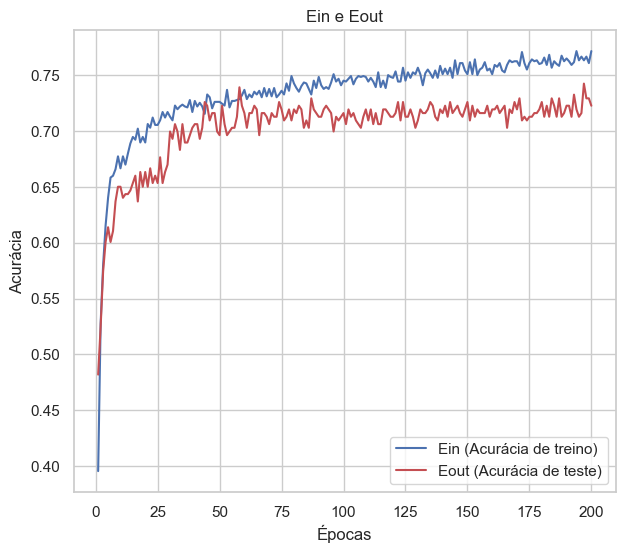

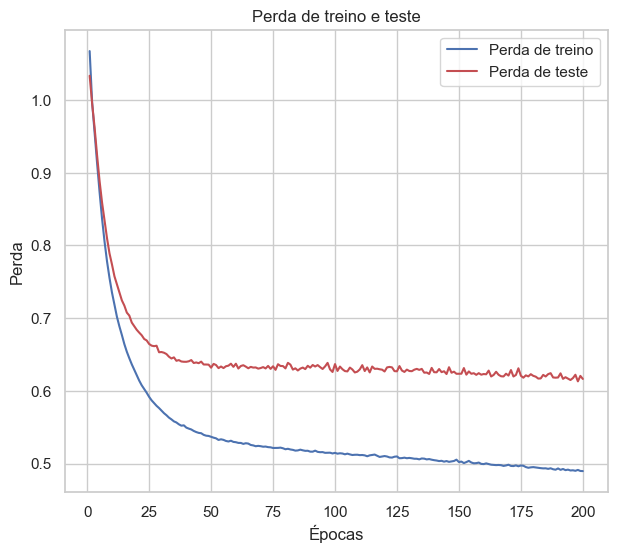

In [65]:
# Resgatando os dados de acurácia e perda do histórico do treinamento
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Definindo o número de épocas para o eixo x
epochs = range(1, len(accuracy) + 1)

# Criando o gráfico de Ein (acurácia de treino) e Eout (acurácia de teste)
plt.figure(figsize=(7, 6))
plt.plot(epochs, accuracy, 'b', label='Ein (Acurácia de treino)')
plt.plot(epochs, val_accuracy, 'r', label='Eout (Acurácia de teste)')
plt.title('Ein e Eout')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Salvando o gráfico de acurácia no formato PNG
plt.savefig('imagens/grafico_acuracia.png')
plt.show()

# Criando o gráfico de perda (Loss) para treino e validação
plt.figure(figsize=(7, 6))
plt.plot(epochs, loss, 'b', label='Perda de treino')
plt.plot(epochs, val_loss, 'r', label='Perda de teste')
plt.title('Perda de treino e teste')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Salvando o gráfico de perda no formato PNG
plt.savefig('imagens/grafico_perda.png')
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
    Métrica Valor
0  Acurácia  0.76
1  Precisão  0.76
2    Recall  0.76
3  F1 Score  0.76


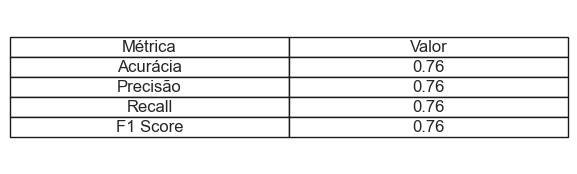

In [69]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prevendo as probabilidades
y_pred_prob = model.predict(X_test)

# Convertendo as probabilidades em classes
y_pred = np.argmax(y_pred_prob, axis=1)  # Para multiclasse, usa-se argmax

# Calculando as métricas de avaliação com média 'macro'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Criando um DataFrame com as métricas e formatando com duas casas decimais
metrics_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Recall', 'F1 Score'],
    'Valor': [f"{accuracy:.2f}", f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"]
})

# Exibindo as métricas com formatação
print(metrics_df)

# Criando um gráfico de tabela simples usando Matplotlib
plt.figure(figsize=(6, 2))  # Ajustando o tamanho da tabela
plt.axis('tight')  # Ajustando os eixos
plt.axis('off')  # Desativar o eixo para exibir apenas a tabela

# Criando a tabela
table = plt.table(cellText=metrics_df.values,
                  colLabels=metrics_df.columns,
                  cellLoc='center', loc='center')

# Ajustando a tabela
table.auto_set_font_size(False)  # Permitir ajuste do tamanho da fonte
table.set_fontsize(12)  # Definindo o tamanho da fonte
table.scale(1.2, 1.2)  # Ajustando a escala da tabela

# Salvando a tabela em formato PNG
plt.savefig('imagens/tabela_metricas.png', bbox_inches='tight')

# Exibindo a tabela
plt.show()


### Árvore de decisão

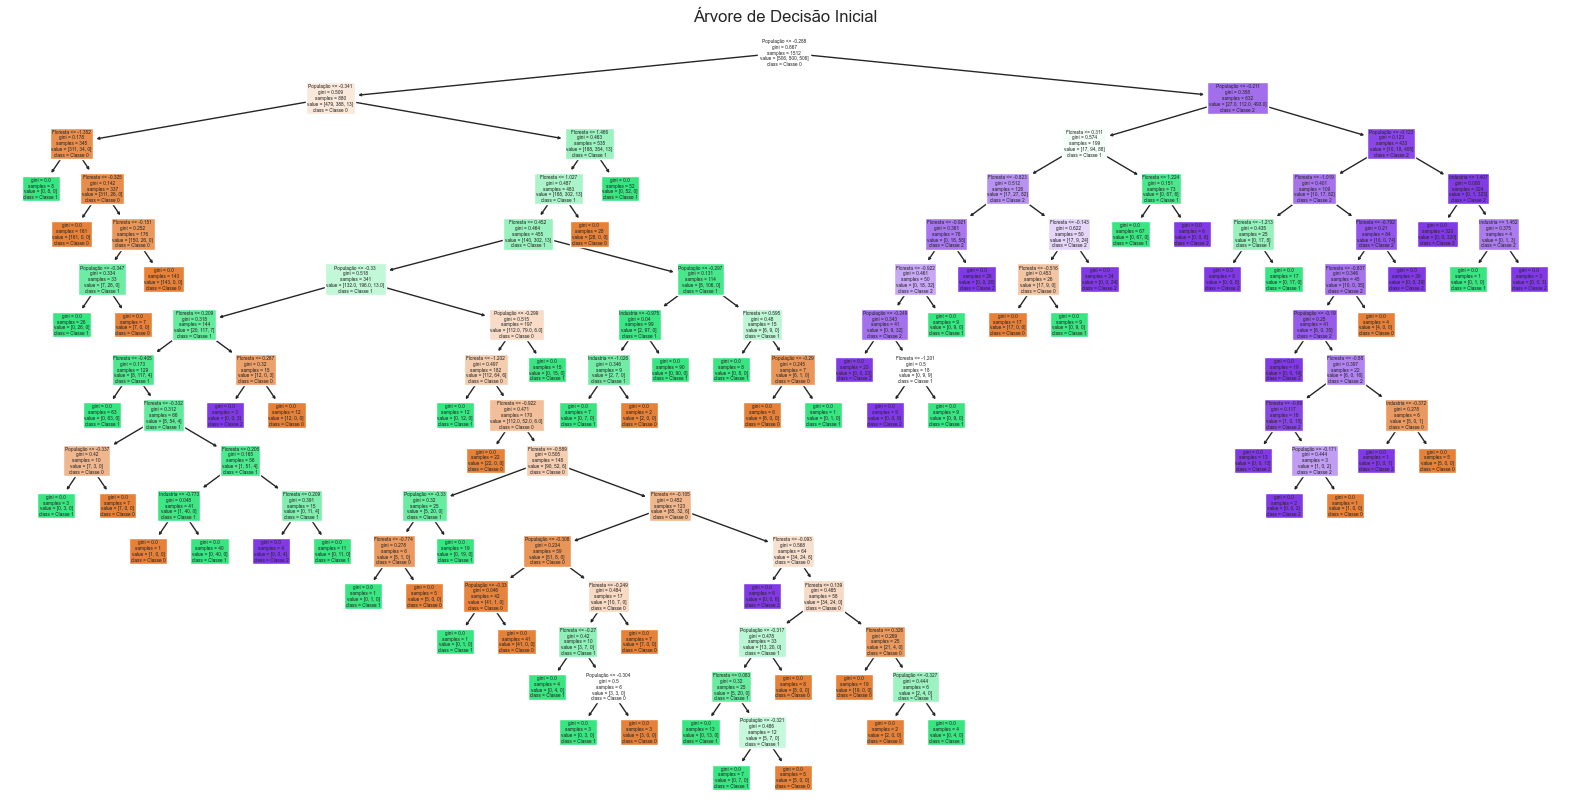

Erro dentro (Ein): 0.0000
Erro fora (Eout): 0.0528


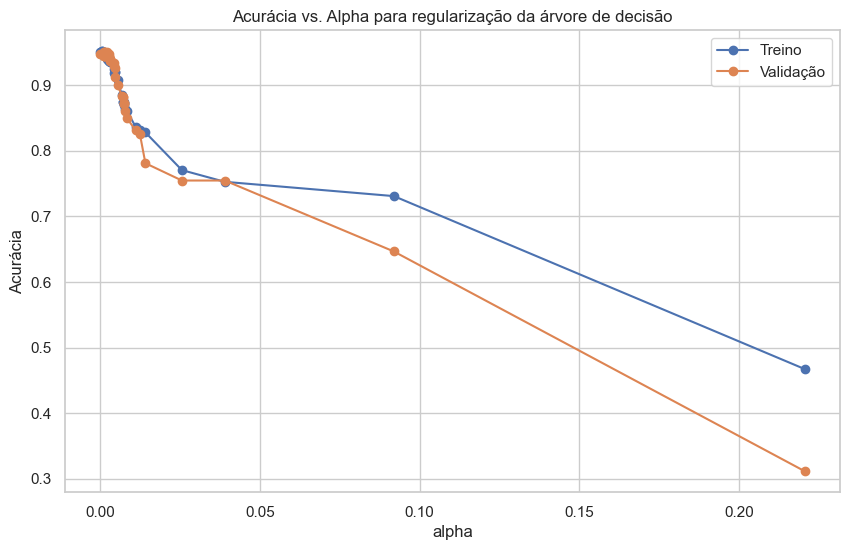

Melhor alpha: 0.0012912572436381954
Acurácia com melhor alpha (validação): 0.9499


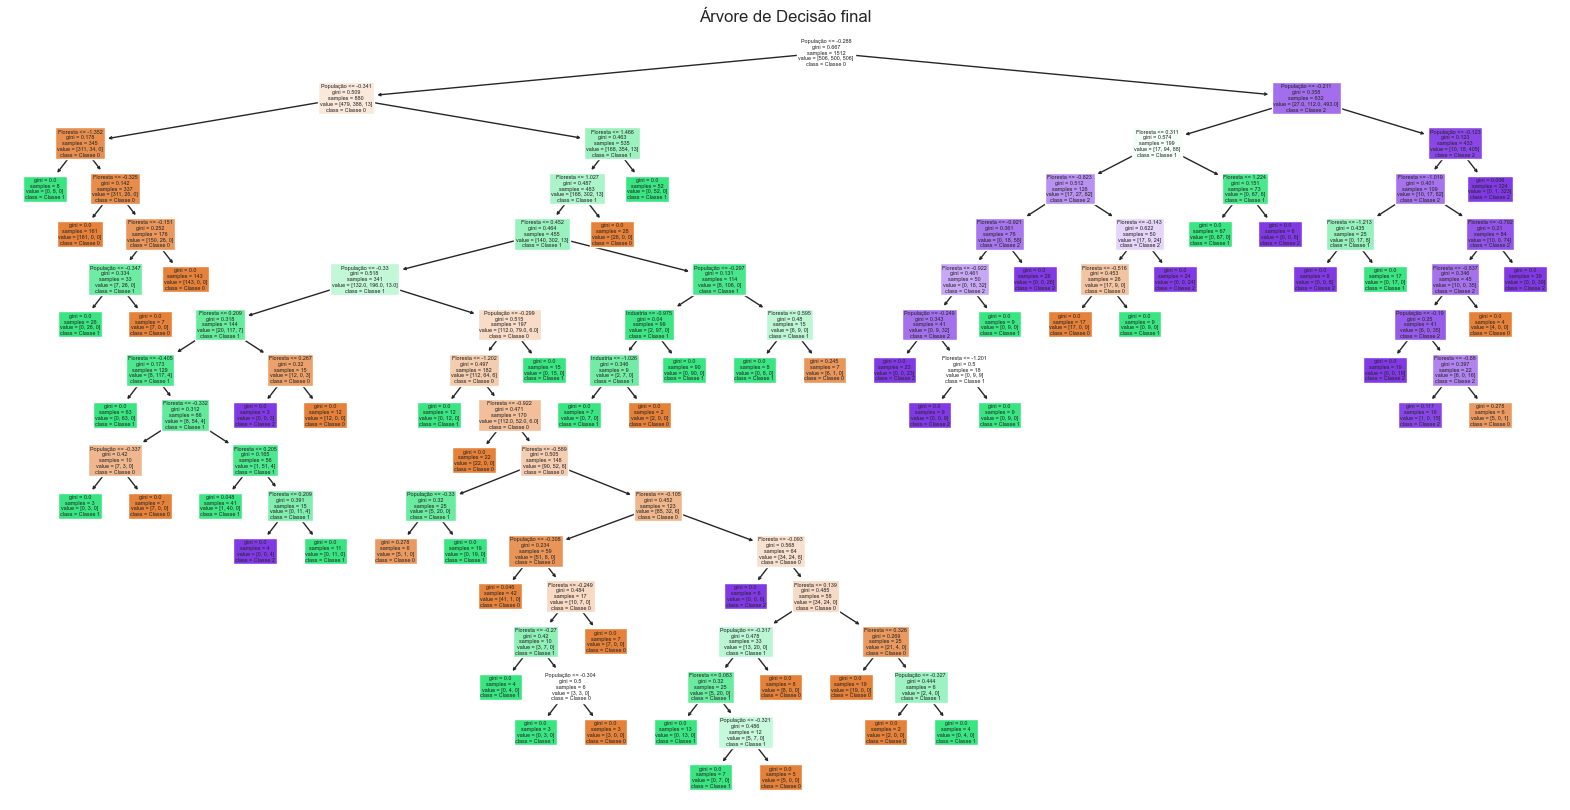

Erro dentro com melhor árvore (Ein): 0.0046
Erro fora com melhor árvore (Eout): 0.0501


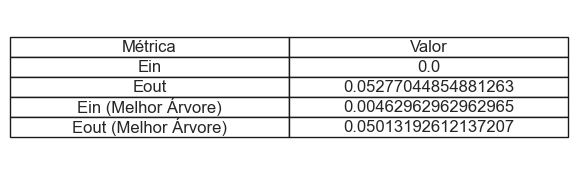

In [70]:
# Dividindo em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Construindo  uma árvore de decisão simples
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

#  Plot da árvore
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=['População', 'Industria', 'Floresta'], class_names=['Classe 0', 'Classe 1', 'Classe 2'])
plt.title('Árvore de Decisão Inicial')
plt.savefig('imagens/arvore_decisao_inicial.png')
plt.show()

# computando Ein e Eout
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Erro dentro (Ein) e fora (Eout)
Ein = 1 - accuracy_score(y_train, y_train_pred)
Eout = 1 - accuracy_score(y_test, y_test_pred)

print(f"Erro dentro (Ein): {Ein:.4f}")
print(f"Erro fora (Eout): {Eout:.4f}")

# regularizar com Minimal Cost-Complexity Pruning (poda)
path = tree.cost_complexity_pruning_path(X_train, y_train)  # Obter os valores de alpha
ccp_alphas = path.ccp_alphas  # Todos os valores de alpha possíveis

# Inicializar variáveis para armazenar os modelos
trees = []
train_scores = []
val_scores = []

# Testanndo diferentes valores de alpha com cross-validation
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    trees.append(clf)
    # Avaliar acurácia com cross-validation (10 folds)
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    train_scores.append(scores.mean())
    val_scores.append(clf.score(X_test, y_test))

# Plotando o gráfico de ccp_alpha versus score (para ver o impacto da regularização)
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Treino")
plt.plot(ccp_alphas, val_scores, marker='o', label="Validação")
plt.xlabel("alpha")
plt.ylabel("Acurácia")
plt.legend()
plt.title("Acurácia vs. Alpha para regularização da árvore de decisão")
plt.show()

# Selecionando o melhor modelo (menor alpha com maior acurácia)
best_tree_index = np.argmax(val_scores)
best_alpha = ccp_alphas[best_tree_index]
best_tree = trees[best_tree_index]

print(f"Melhor alpha: {best_alpha}")
print(f"Acurácia com melhor alpha (validação): {val_scores[best_tree_index]:.4f}")

# Plotando a melhor árvore
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=['População', 'Industria', 'Floresta'], class_names=['Classe 0', 'Classe 1', 'Classe 2'])
plt.title('Árvore de Decisão final')
plt.savefig('imagens/arvore_decisao_final.png')
plt.show()

# Recalculando as métricas de Ein e Eout para a melhor árvore
y_train_pred_best = best_tree.predict(X_train)
y_test_pred_best = best_tree.predict(X_test)

Ein_best = 1 - accuracy_score(y_train, y_train_pred_best)
Eout_best = 1 - accuracy_score(y_test, y_test_pred_best)

metrics_df = pd.DataFrame({
    'Métrica': ['Ein', 'Eout', 'Ein (Melhor Árvore)', 'Eout (Melhor Árvore)'],
    'Valor': [Ein, Eout, Ein_best, Eout_best]
})

# Plotando uma tabela simples
plt.figure(figsize=(6, 2))
plt.axis('tight')
plt.axis('off')
table = plt.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False) # Permitir ajuste de tamanho da fonte
table.set_fontsize(12)
table.scale(1.2, 1.2) # Ajustar o tamanho da tabela
# Salvando a tabela
plt.savefig('imagens/ein_eout.png', bbox_inches='tight')

print(f"Erro dentro com melhor árvore (Ein): {Ein_best:.4f}")
print(f"Erro fora com melhor árvore (Eout): {Eout_best:.4f}")


### SVM

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Melhores parâmetros: {'estimator__C': 100, 'estimator__gamma': 1}
------------ Relatório de Classificação ----------------
              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76       125
         1.0       0.74      0.69      0.71       126
         2.0       0.95      0.91      0.93       128

    accuracy                           0.80       379
   macro avg       0.80      0.80      0.80       379
weighted avg       0.81      0.80      0.80       379



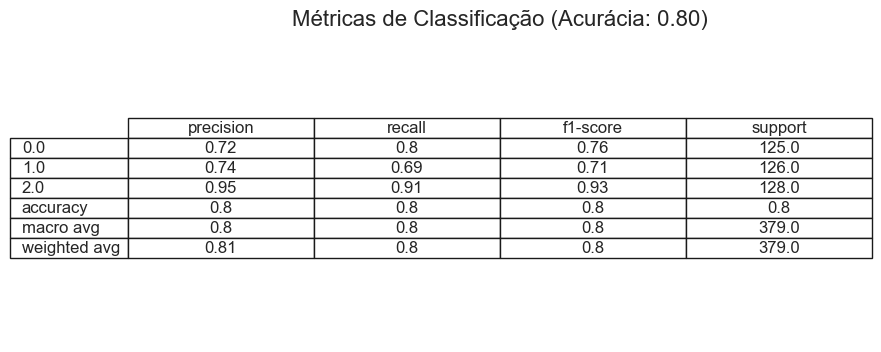

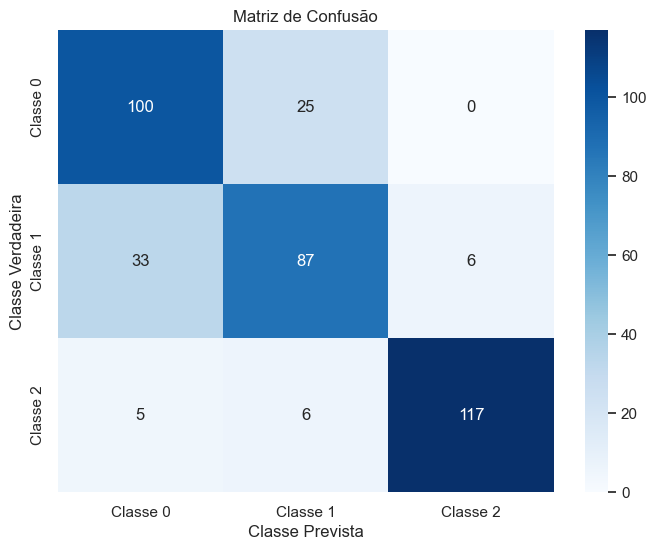

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Balancear as classes usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Definir os parâmetros para ajuste
param_grid = {
    'estimator__C': [0.1, 1, 10, 100],
    'estimator__gamma': [0.001, 0.01, 0.1, 1]
}

# Criar o modelo SVM dentro do OneVsRestClassifier
svm = SVC(kernel='rbf', class_weight='balanced', probability=True)
ovr_svm = OneVsRestClassifier(svm)

# Usando GridSearchCV para encontrar os melhores parâmetros
grid_search = GridSearchCV(ovr_svm, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(X_resampled, y_resampled)

# Melhores parâmetros encontrados
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Treinar o modelo com os melhores parâmetros
best_model = grid_search.best_estimator_
best_model.fit(X_resampled, y_resampled)

# Prever os rótulos para o conjunto de teste
y_pred = best_model.predict(X_test)

# Relatório de classificação
print("------------ Relatório de Classificação ----------------")
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Extraindo as métricas do relatório
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df[['precision', 'recall', 'f1-score', 'support']].round(2)

# Criando uma figura para a tabela
plt.figure(figsize=(8, 4))
plt.axis('tight')
plt.axis('off')

# Adicionando a acurácia global ao título da tabela
accuracy = accuracy_score(y_test, y_pred)
plt.title(f'Métricas de Classificação (Acurácia: {accuracy:.2f})', fontsize=16)

# Criando a tabela
table = plt.table(cellText=metrics_df.values,
                  colLabels=metrics_df.columns,
                  rowLabels=metrics_df.index,
                  cellLoc='center',
                  loc='center')

# Ajustando a tabela
table.auto_set_font_size(False) 
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Ajustando o tamanho da tabela

# Salvando a tabela como PNG
plt.savefig('imagens/metricas_classificacao2.png', bbox_inches='tight', dpi=300)
plt.show()

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1', 'Classe 2'], yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.title('Matriz de Confusão')
plt.savefig('imagens/matriz.png')
plt.show()
